# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [3]:
df = pd.read_csv('NYC_temp.txt',delimiter='\t',skipfooter=14,engine='python')

In [4]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,40.38
1,NaN,"Jan 02, 1979",1979/01/02,38.92
2,NaN,"Jan 03, 1979",1979/01/03,24.24
3,NaN,"Jan 04, 1979",1979/01/04,14.75
4,NaN,"Jan 05, 1979",1979/01/05,14.62
...,...,...,...,...
12049,NaN,"Dec 28, 2011",2011/12/28,36.93
12050,NaN,"Dec 29, 2011",2011/12/29,25.04
12051,NaN,"Dec 30, 2011",2011/12/30,34.93
12052,NaN,"Dec 31, 2011",2011/12/31,38.43


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [5]:
df2 = df.drop(df[df['Notes'] == 'Total'].index)
df2.drop('Notes', inplace=True, axis=1)



>3) Make a column called Date that is in the pandas datetime format

In [6]:
df2['Date'] = pd.to_datetime(df2['Month Day, Year'], errors='raise')
df2

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date
0,"Jan 01, 1979",1979/01/01,40.38,1979-01-01
1,"Jan 02, 1979",1979/01/02,38.92,1979-01-02
2,"Jan 03, 1979",1979/01/03,24.24,1979-01-03
3,"Jan 04, 1979",1979/01/04,14.75,1979-01-04
4,"Jan 05, 1979",1979/01/05,14.62,1979-01-05
...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,40.38,2011-12-27
12049,"Dec 28, 2011",2011/12/28,36.93,2011-12-28
12050,"Dec 29, 2011",2011/12/29,25.04,2011-12-29
12051,"Dec 30, 2011",2011/12/30,34.93,2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [7]:
df2[["Year","Month","Day"]] = df2["Month Day, Year Code"].str.split("/", expand = True)
df2.head()

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day
0,"Jan 01, 1979",1979/01/01,40.38,1979-01-01,1979,01,01
1,"Jan 02, 1979",1979/01/02,38.92,1979-01-02,1979,01,02
2,"Jan 03, 1979",1979/01/03,24.24,1979-01-03,1979,01,03
3,"Jan 04, 1979",1979/01/04,14.75,1979-01-04,1979,01,04
4,"Jan 05, 1979",1979/01/05,14.62,1979-01-05,1979,01,05


In [8]:
df2['DateInt'] = df2['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

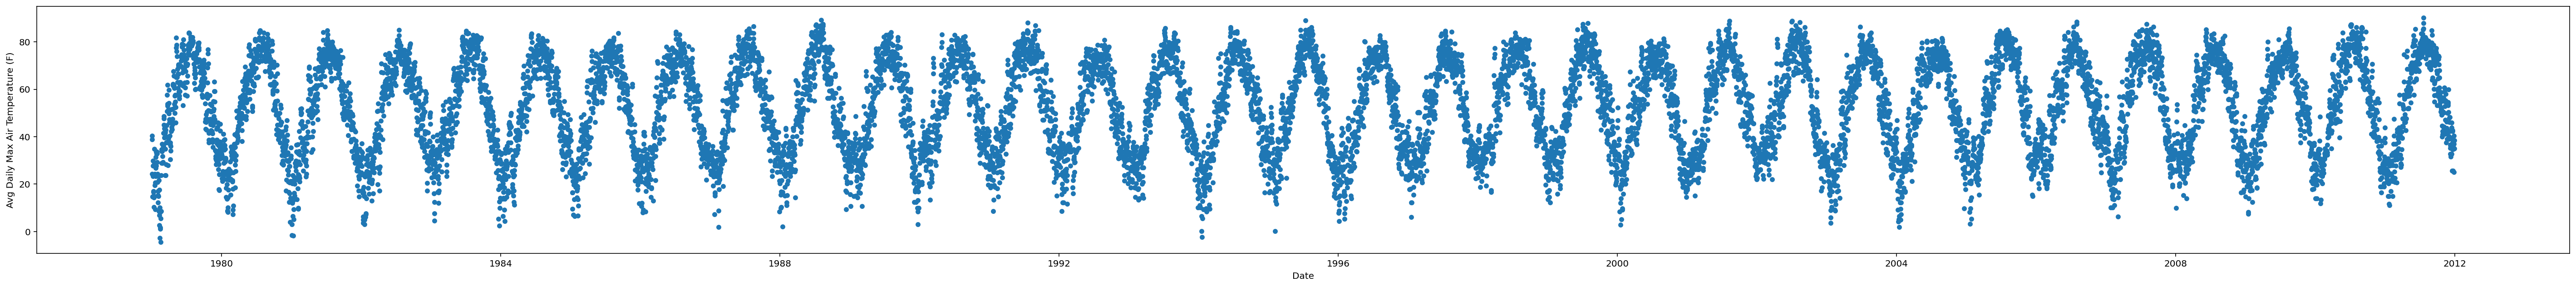

In [9]:
df2.plot.scatter(x = "Date", y="Avg Daily Max Air Temperature (F)", figsize=(50,5))

>5) Describe your plot.

This plot is for average daily maximum air temperature of New York State from years 1979-2011

### Adding colors for our graph

In [10]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df2['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df2['color']=[c[int(i-1)] for i in df2['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

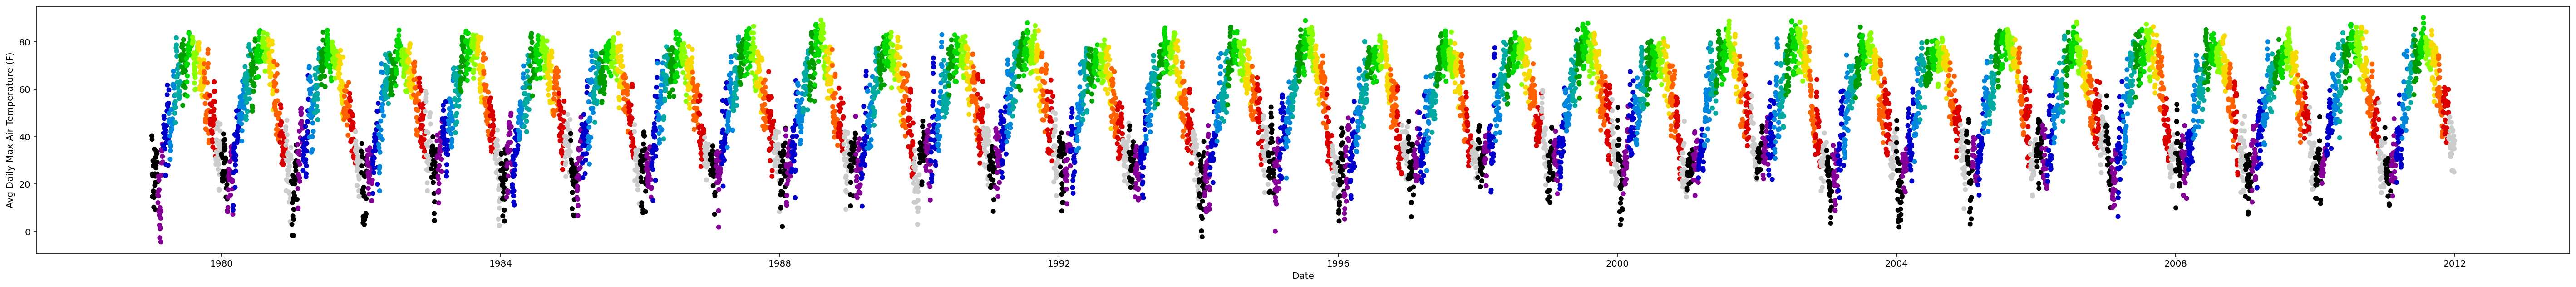

In [11]:
df2.plot.scatter(x = "Date", y="Avg Daily Max Air Temperature (F)", figsize=(50,5), c=df2['color'])

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [12]:
df3 = df2[(df2['Date'] >= pd.datetime(1990, 1, 1))]
df3 = df3[(df3['Date'] <= pd.datetime(1990, 6, 1))]
df3

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day,DateInt,color
4018,"Jan 01, 1990",1990/01/01,34.60,1990-01-01,1990,01,01,6311520.0,#000000
4019,"Jan 02, 1990",1990/01/02,28.96,1990-01-02,1990,01,02,6312384.0,#000000
4020,"Jan 03, 1990",1990/01/03,32.44,1990-01-03,1990,01,03,6313248.0,#000000
4021,"Jan 04, 1990",1990/01/04,37.41,1990-01-04,1990,01,04,6314112.0,#000000
4022,"Jan 05, 1990",1990/01/05,34.64,1990-01-05,1990,01,05,6314976.0,#000000
...,...,...,...,...,...,...,...,...,...
4165,"May 28, 1990",1990/05/28,70.47,1990-05-28,1990,05,28,6438528.0,#00aaa1
4166,"May 29, 1990",1990/05/29,56.33,1990-05-29,1990,05,29,6439392.0,#00aaa1
4167,"May 30, 1990",1990/05/30,54.30,1990-05-30,1990,05,30,6440256.0,#00aaa1
4168,"May 31, 1990",1990/05/31,62.61,1990-05-31,1990,05,31,6441120.0,#00aaa1


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

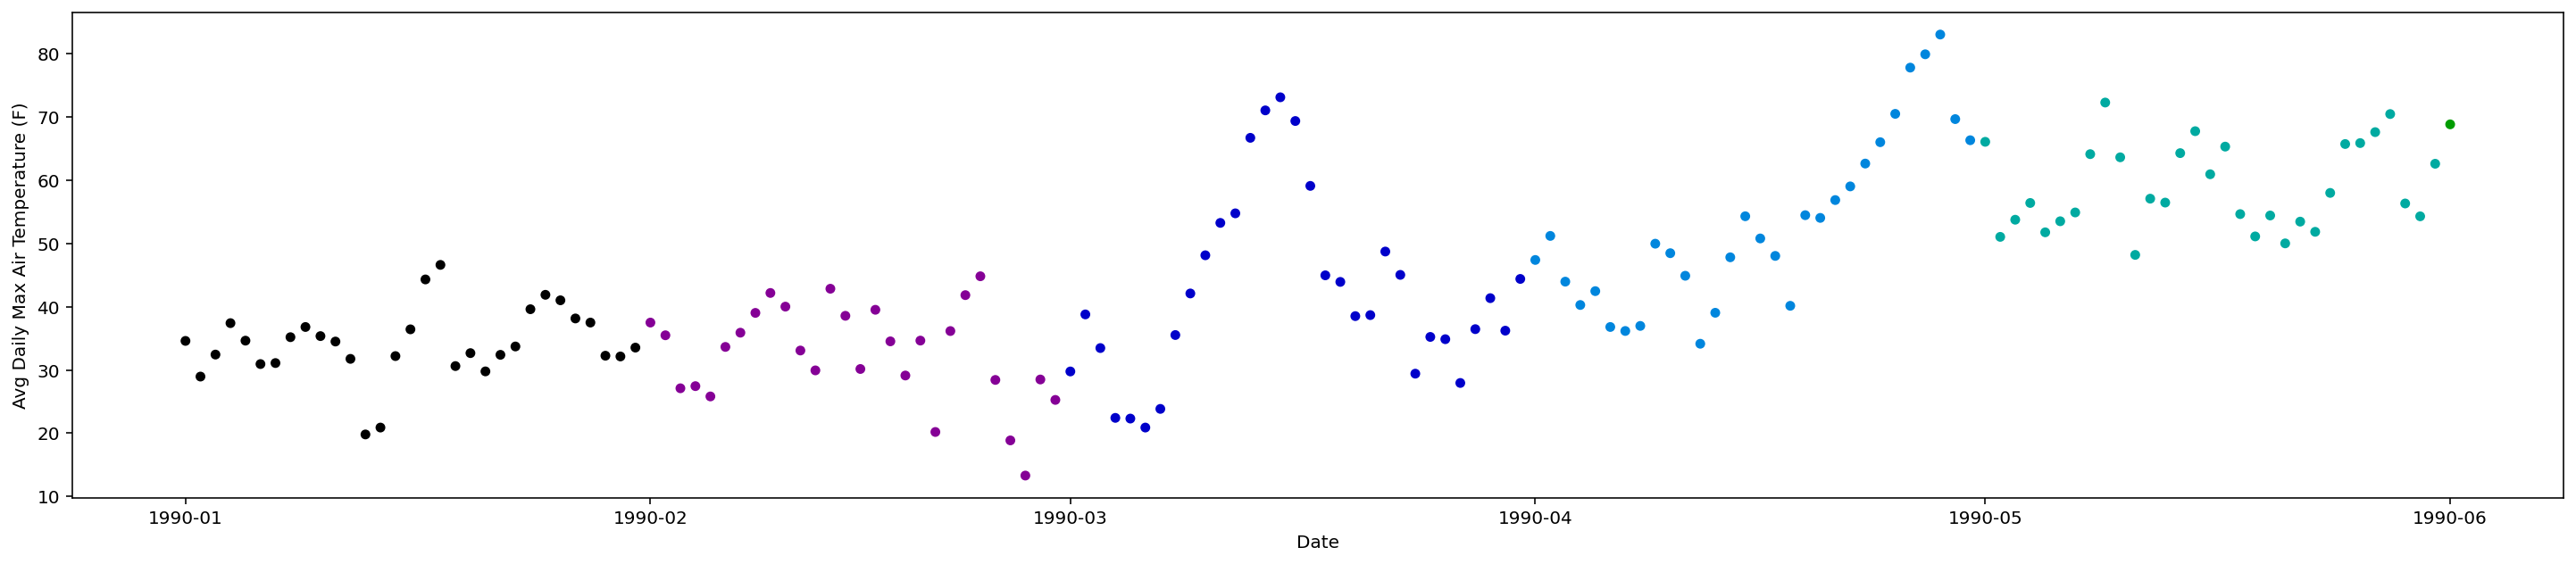

In [15]:
df3.plot.scatter(x = "Date", y="Avg Daily Max Air Temperature (F)", figsize=(25,5), c=df3['color'])

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [16]:
X=df3['DateInt'].values
Y=df3['Avg Daily Max Air Temperature (F)'].values

In [17]:
def lin_reg(x,y):
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [18]:
Y_pred = lin_reg(X,Y)

0.0002727345335394785 -1694.6214032695682


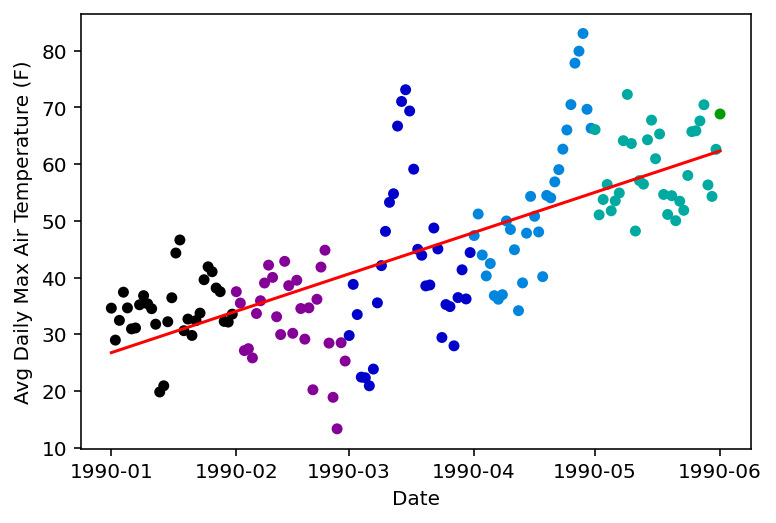

In [19]:
df3.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=df3['color'])
plt.plot([min(df3['Date'].values), max(df3['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

0.0002727345335394785 is the slope
-1694.6214032695682 is the intercept

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [20]:
min(Y_pred)

26.748059855521205

In [21]:
max(Y_pred)

62.33009803921573

Slope is positive

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [22]:
X2=df2['DateInt'].values
Y2=df2['Avg Daily Max Air Temperature (F)'].values
pred = lin_reg(X2,Y2)



2.9512404066376017e-07 50.21476933875328


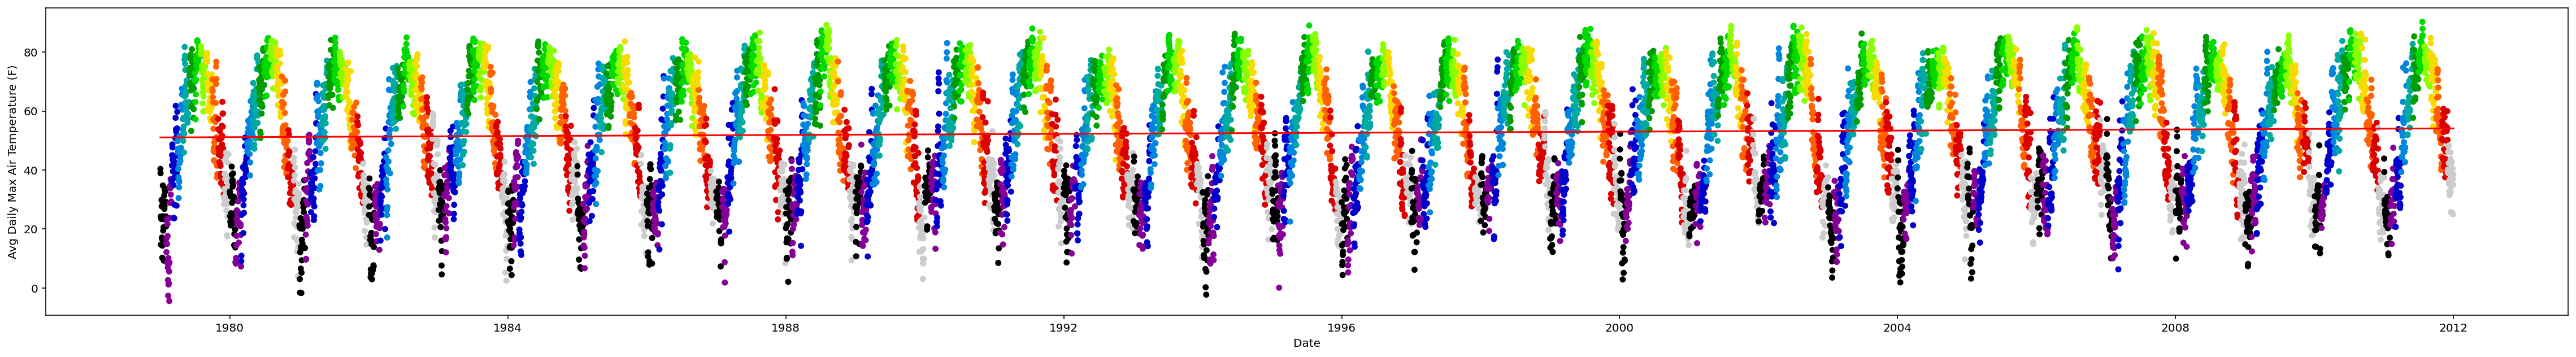

In [24]:
df2.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', figsize=(40,5), c=df2['color'])
plt.plot([min(df2['Date'].values), max(df2['Date'].values)], [min(pred), max(pred)], color='red') 
plt.show()

>12) Is the slope positive or negative? What do you think that means?

There is a positive slope in this graph for the line of best fit. This graph shows temperture data from 1979-2011. There is an upward slope due to rising average global temperatures cause by global warming.
\